<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline

In [0]:
from fastai import*
from fastai.vision import *

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [40]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [41]:
path = untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [42]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [44]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_57.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_217.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_108.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_39.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_71.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)

In [47]:
data

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Maine_Coon,Siamese,yorkshire_terrier,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,english_cocker_spaniel,american_bulldog,wheaten_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

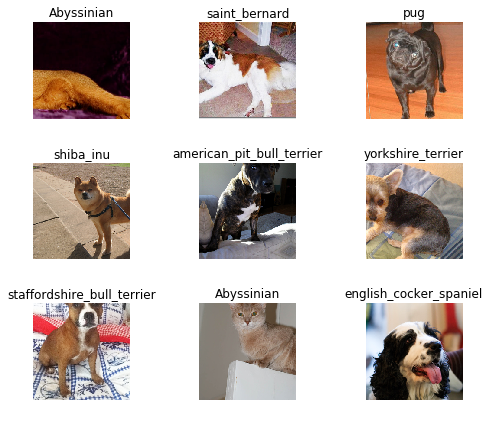

In [48]:
data.show_batch(rows=3, figsize=(7, 6))

In [49]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [50]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Maine_Coon,Siamese,yorkshire_terrier,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,english_cocker_spaniel,american_bulldog,wheaten_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

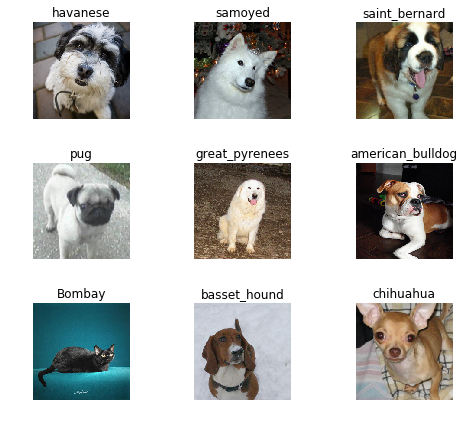

In [51]:
data.show_batch(rows=3, figsize=(7, 6))

In [52]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [53]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [54]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.411047,0.329165,0.088633,01:58
1,0.551322,0.254482,0.081191,01:58
2,0.352364,0.210865,0.062246,01:57
3,0.268299,0.216385,0.064953,01:58


In [0]:
learn.save('stage-1')

# **Results**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

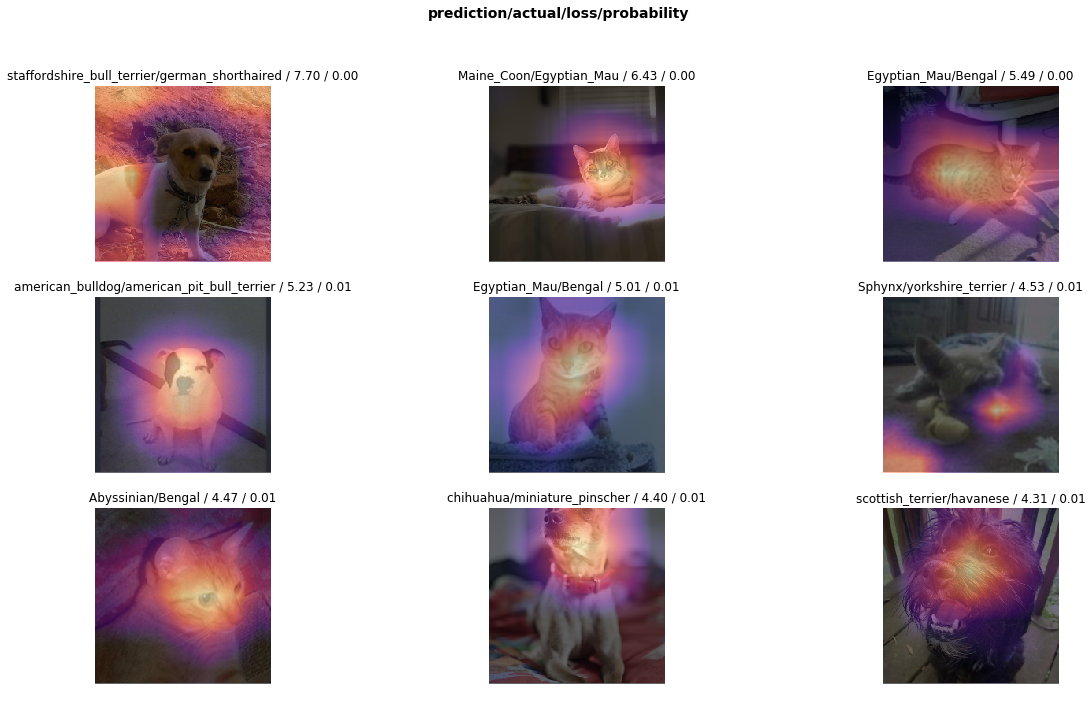

In [56]:
interp.plot_top_losses(9, figsize=(20,11), heatmap=True)

In [0]:
doc(interp.plot_top_losses)

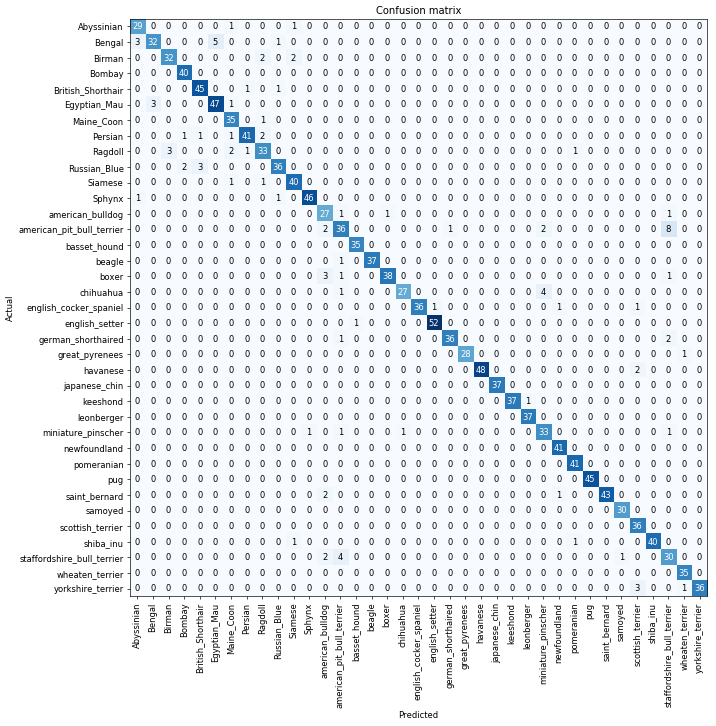

In [0]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [0]:
doc(interp.plot_confusion_matrix)

In [0]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Bengal', 'Egyptian_Mau', 5),
 ('chihuahua', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('boxer', 'american_bulldog', 3),
 ('yorkshire_terrier', 'scottish_terrier', 3),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('german_shorthaired', 'staffordshire_bull_terrier', 2),
 ('havanese', 'scottish_terrier', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.494818,0.295383,0.088633,02:12


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pomeranian,Maine_Coon,Siamese,yorkshire_terrier,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Persian,english_cocker_spaniel,american_bulldog,wheaten_terrier,shiba_inu
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_s

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


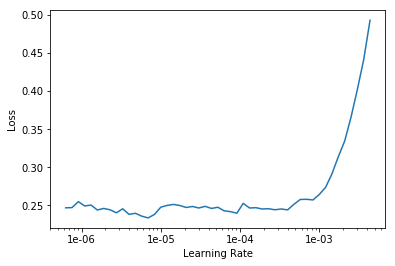

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.229052,0.201634,0.065629,02:11
1,0.208256,0.192451,0.062923,02:14


# **ResNet50**

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=20)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Maine_Coon,Siamese,Bengal,newfoundland,great_pyrenees
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Abyssinian,yorkshire_terrier,Birman,Maine_Coon,Bombay
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [0]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learn.fit_one_cycle(8, max_lr=slice(1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.039128,0.390162,0.092016,04:19
1,0.502538,0.242376,0.073748,04:08
2,0.383309,0.197948,0.073072,04:09
3,0.290500,0.181228,0.060893,04:08
4,0.236710,0.149768,0.054127,04:09
5,0.175547,0.138614,0.052774,04:04
6,0.139591,0.134868,0.050068,04:05
7,0.138574,0.130825,0.052097,04:07


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.134205,0.132508,0.048714,05:07


In [0]:
learn.save('stage-1-50')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

# **Homework**

In [88]:
path = untar_data(URLs.PLANET_SAMPLE);path

PosixPath('/root/.fastai/data/planet_sample')

In [89]:
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train'),
 PosixPath('/root/.fastai/data/planet_sample/models')]

In [90]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/planet_sample/train/train_11664.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_5811.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_12498.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_9399.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_22681.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_24353.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_21447.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_5721.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_13053.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_17692.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_32315.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_5707.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_1004.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_11588.jpg'),
 PosixPath('/root/.fastai

In [91]:
df = pd.read_csv(path/'labels.csv')
df['image_name'] = 'train/' + df['image_name'] + '.jpg'
df.head()

,image_name,tags
0,train/train_21983.jpg,partly_cloudy primary
1,train/train_9516.jpg,clear cultivation primary water
2,train/train_12664.jpg,haze primary
3,train/train_36960.jpg,clear primary
4,train/train_5302.jpg,haze primary road


In [92]:
data = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(), size=224)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
bare_ground partly_cloudy primary, agriculture clear primary road selective_logging, agriculture cultivation cultivation partly_cloudy primary water, agriculture habitation partly_cloudy road, habitation partly_cloudy primary water...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [93]:
data

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
partly_cloudy primary,clear cultivation primary water,haze primary,clear primary,clear primary
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
clear cultivation primary,clear primary water,clear primary,agriculture habitation partly_cloudy primary road,agriculture clear primary water
Path: /root/.fastai/data/planet_sample;

Test: None

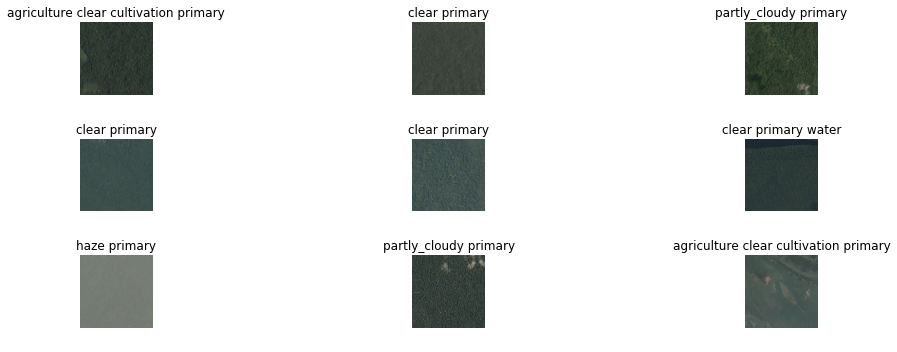

In [94]:
data.show_batch(rows=3, figsize=(15,5))

In [95]:
len(data.classes), data.c

(90, 90)

In [96]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
partly_cloudy primary,clear cultivation primary water,haze primary,clear primary,clear primary
Path: /root/.fastai/data/planet_sample;

Valid: LabelList (189 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
clear cultivation primary,clear primary water,clear primary,agriculture habitation partly_cloudy primary road,agriculture clear primary water
Path: /root/.fastai/data/planet_sample;

Test: None

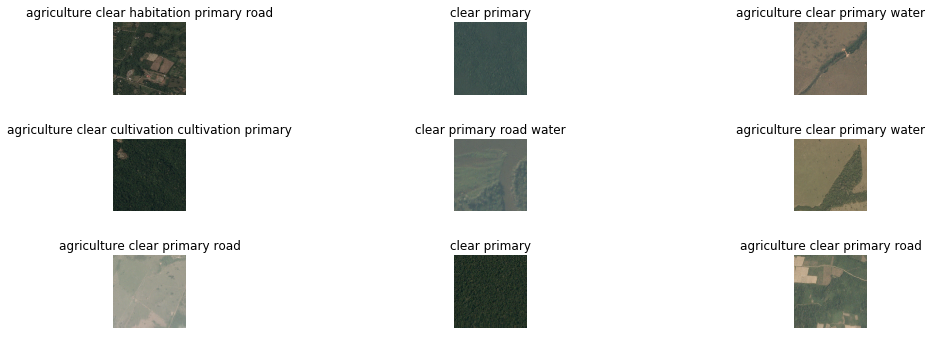

In [97]:
data.show_batch(rows=3, figsize=(15,5))

## Training(ResNet34)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [99]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,4.497154,2.870905,0.507937,00:11
1,3.502569,2.208425,0.444444,00:10
2,2.968820,2.102844,0.433862,00:10


In [0]:
learn.save('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

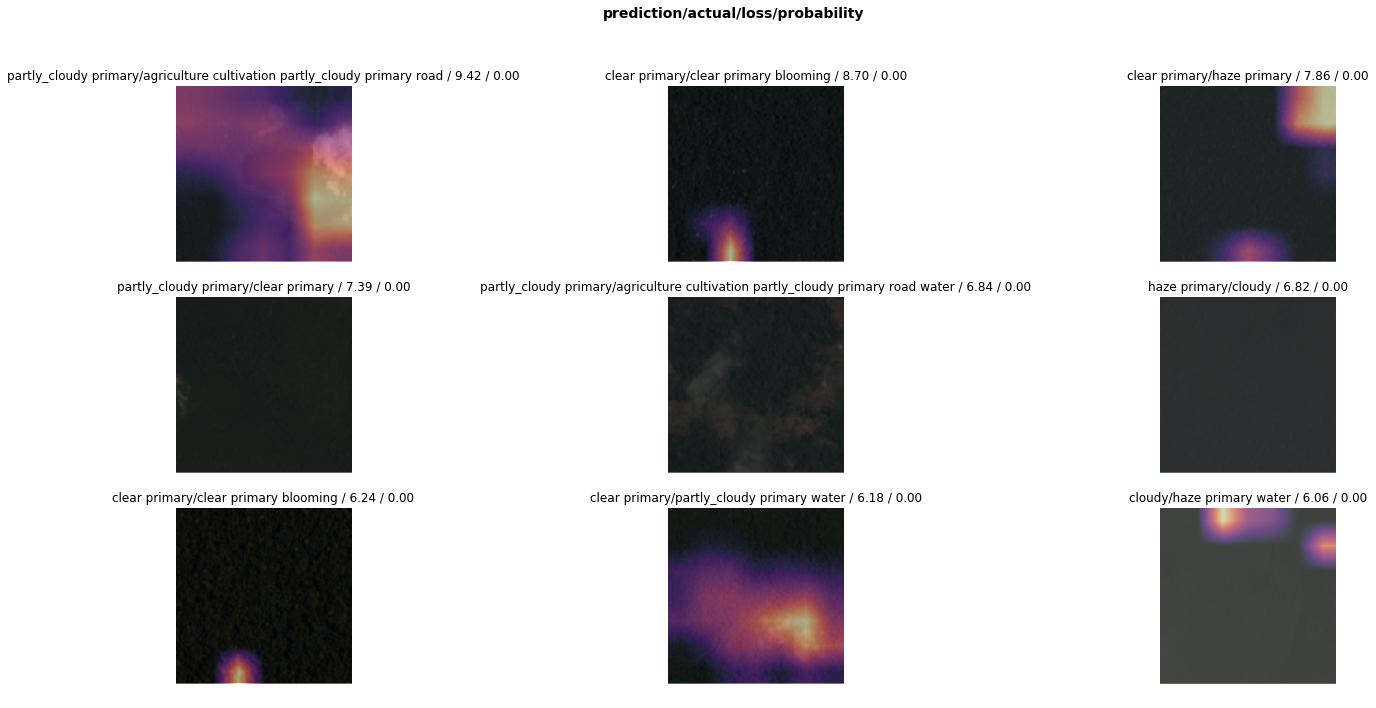

In [102]:
interp.plot_top_losses(9, figsize=(25,11), heatmap=True)

In [103]:
interp.most_confused(min_val=2)

[('agriculture clear primary', 'agriculture clear primary road', 5),
 ('clear cultivation primary', 'clear primary', 5),
 ('agriculture clear habitation primary road',
  'agriculture clear primary road',
  3),
 ('haze primary', 'clear primary', 3),
 ('agriculture clear cultivation habitation primary road',
  'agriculture clear primary road',
  2),
 ('agriculture clear cultivation primary', 'agriculture clear primary', 2),
 ('agriculture clear primary', 'partly_cloudy primary', 2),
 ('agriculture clear primary road', 'agriculture clear primary', 2),
 ('agriculture habitation partly_cloudy primary road',
  'partly_cloudy primary',
  2),
 ('agriculture partly_cloudy primary', 'agriculture clear primary road', 2),
 ('clear primary blooming', 'clear primary', 2),
 ('clear primary water', 'clear primary', 2)]

In [104]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,2.160094,2.106458,0.449735,00:11


## Training(ResNet50)

In [105]:
data = ImageDataBunch.from_df(path, df, ds_tfms=get_transforms(), size=224, bs=112)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
agriculture clear primary road selective_logging, clear cultivation habitation primary water, agriculture bare_ground clear primary, habitation partly_cloudy primary water, bare_ground partly_cloudy...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [106]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:03, 27777573.44it/s]


In [108]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.148351,4.607307,0.901554,00:31
1,3.219642,5.195076,0.886010,00:16
2,2.695537,3.941422,0.751295,00:16
3,2.425185,2.792023,0.580311,00:16
